# Drugi domaci zadatak iz predmeta masinsko ucenje

### Dragana Ninkovic 2023/3010

### B3 = 1 B4 = 0 ->Softmax, GDA

## Unos podataka i pretprocesiranje

In [1]:
##% Import libararies
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns

In [2]:
#%% Read data
data = np.loadtxt("C:/Users/Dragana/Desktop/ML_DZ_2/multiclass_data.csv", delimiter = ',');

In [3]:
#%% Random shuffle data
seed_value = 42
np.random.seed(seed_value)
np.random.shuffle(data)
print(data.shape)

(178, 6)


In [4]:
#%% Divide on features and labels
X = data[:, 0:5];
y = (data[:,5]).astype(int);
n_samples, n_features = X.shape

Text(0.5, 0.98, 'Input data')

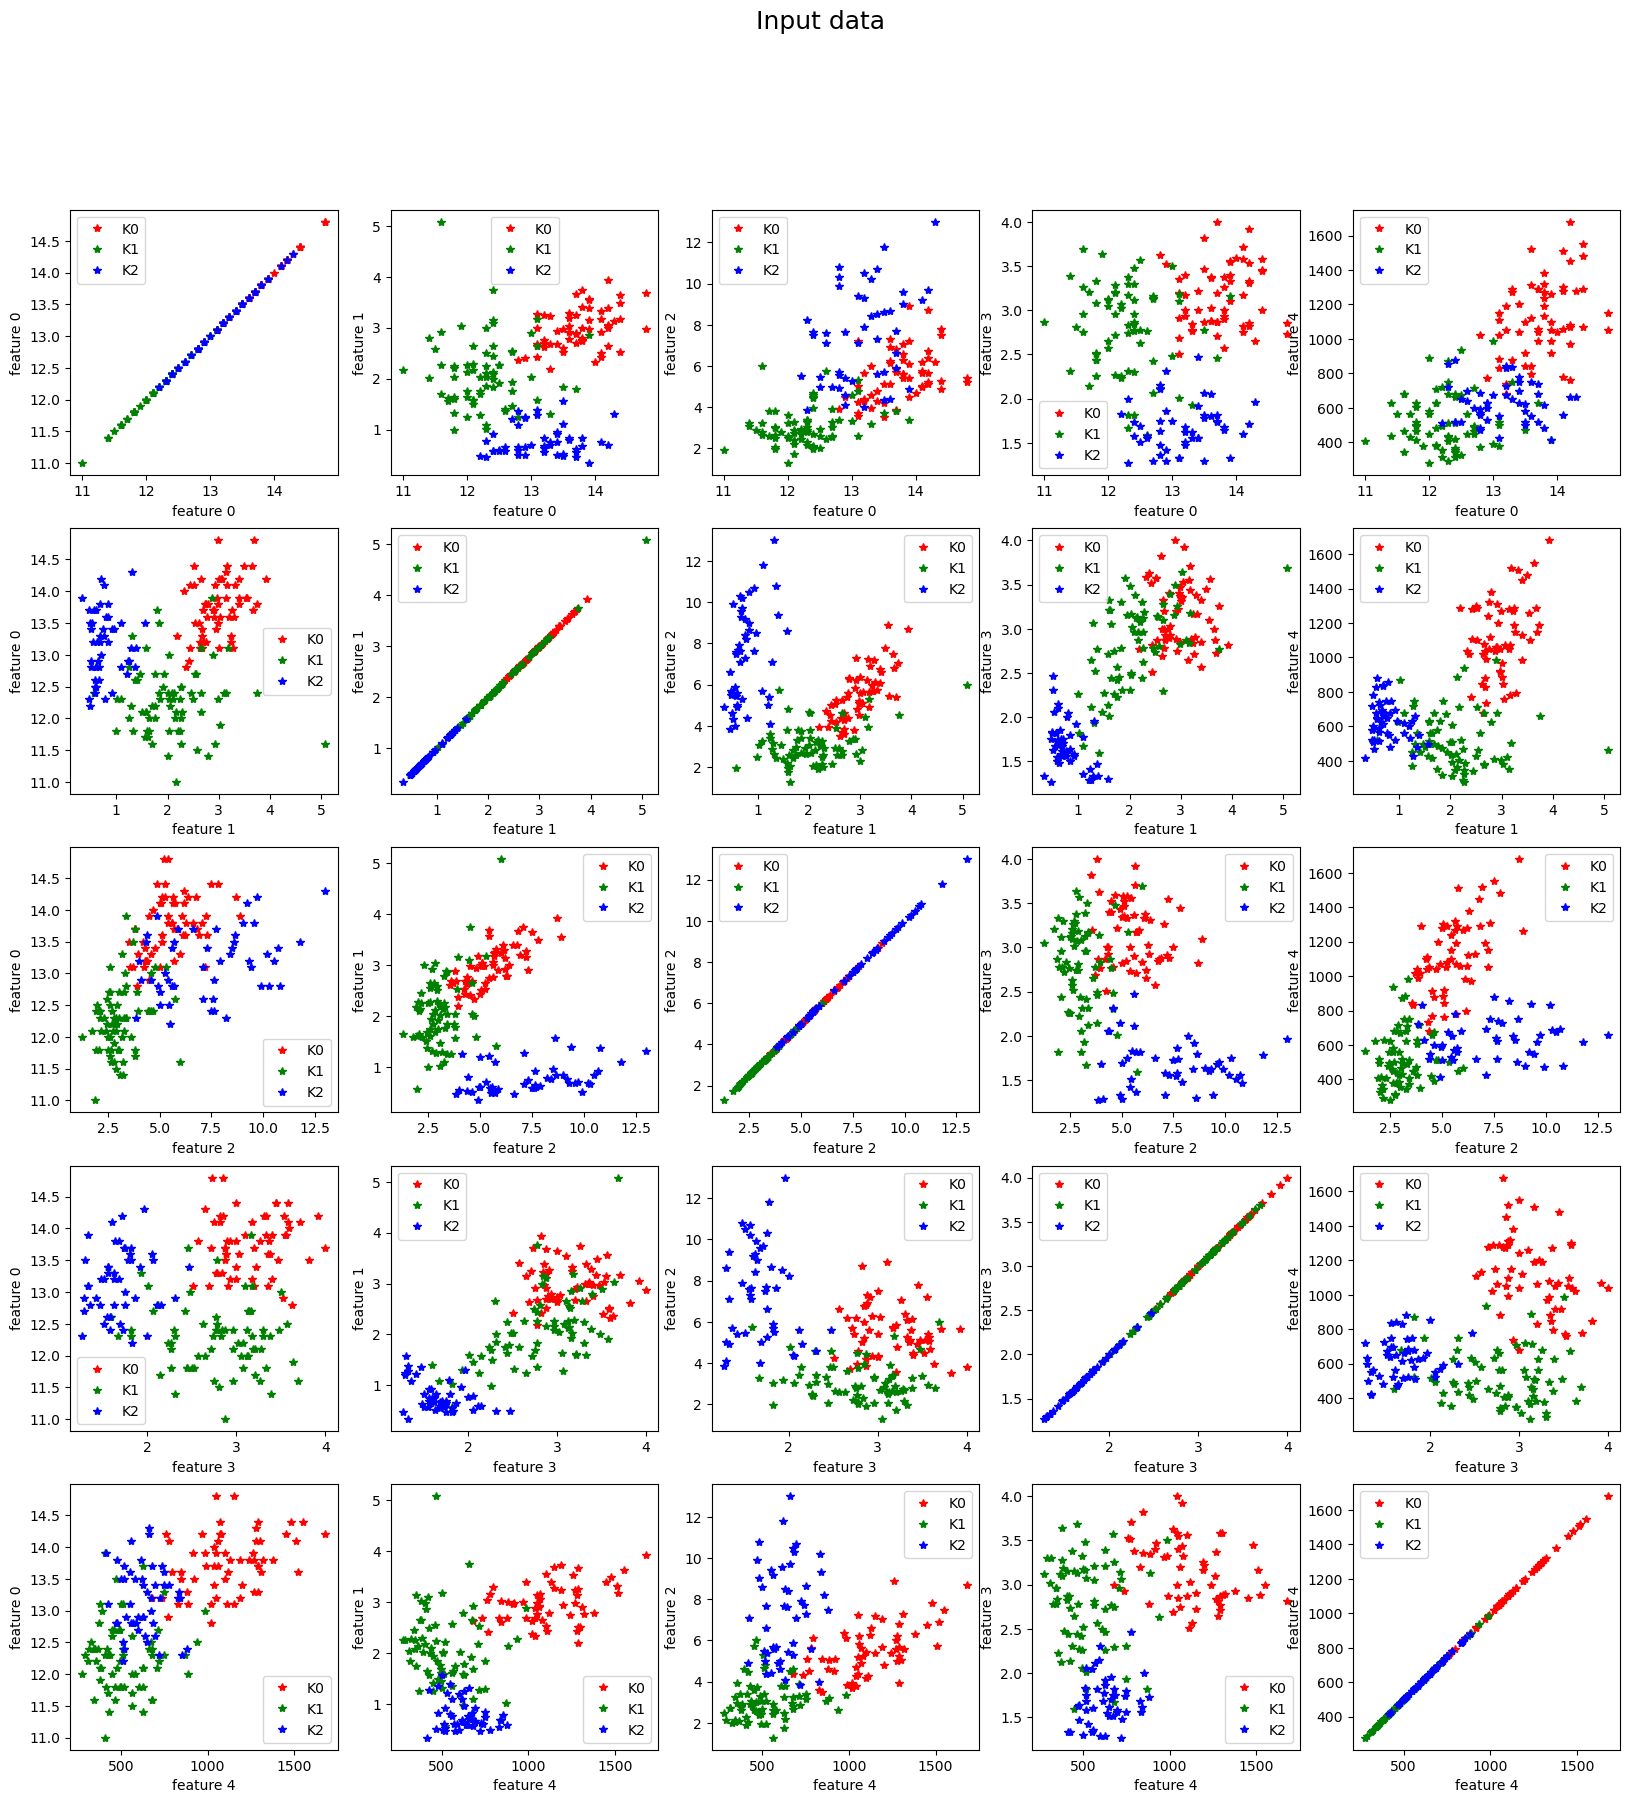

In [5]:
#%% plot data
fig,axs = plt.subplots(ncols = 5, nrows = 5, figsize = (20,20) )
for i in range(0,n_features):
    for j in range(0, n_features):
        axs[i,j].plot(X[y == 0, i],X[y== 0, j],'r*')
        axs[i,j].plot(X[y == 1, i],X[y== 1, j],'g*')
        axs[i,j].plot(X[y == 2, i],X[y== 2, j],'b*')
        axs[i,j].set_xlabel('feature '+str(i))
        axs[i,j].set_ylabel('feature '+str(j))
        axs[i,j].legend(['K0','K1','K2'])
fig.suptitle('Input data',fontsize=18)

In [6]:
#%% Split data on training and test set
train_size = int(0.8*X.shape[0])
X_train = X[0:train_size, :]
y_train = y[0:train_size]
X_test = X[train_size:,:]
y_test = y[train_size:]

In [7]:
#%% Store classes
classes = np.unique(y)
n_classes = len(classes)

In [8]:
#%% Standardize data
X_mean = np.mean(X, axis = 0);
X_std = np.std(X, axis = 0);
X_train_norm = (X_train - X_mean)/X_std
X_test_norm = (X_test - X_mean)/X_std

In [9]:
# add ones for theta0
X_train_norm = np.concatenate([np.ones((X_train_norm.shape[0],1)),X_train_norm], axis = 1);
X_train_norm.shape

(142, 6)

In [10]:
# add ones for theta0
X_test_norm = np.concatenate([np.ones((X_test_norm.shape[0],1)),X_test_norm], axis = 1);
X_test_norm.shape

(36, 6)

## Softmax

Multinomijalna logistička regresija spada u klasu generalizovanih linearnih modela pri cemu je za problem klasifikacije u k klasa:

$$ T(y) =\begin{bmatrix}  I_{y == 1}\\ I_{y==2}\\...\\I_{y== k-1}\\ I_{y == k}\end{bmatrix}, \eta = \begin{bmatrix}  \ln \frac{\phi_1}{\phi_k}\\ \ln \frac{\phi_2}{\phi_k}\\...\\\ln \frac{\phi_{k-1}}{\phi_k} \\ 0\end{bmatrix}, h_{\theta}(x) =   \begin{bmatrix}  \phi_1\\ \phi_2\\...\\ \phi_{k-1}\\ \phi_k \end{bmatrix}, \phi_i = \frac{e^{\eta[i]}}{\sum_{j=1}^k e^{\eta[j]}}$$

$$\eta^{(i)} = \begin{bmatrix} \theta_{10}+\theta_{11}x1+...\theta_{1n}xn\\ \\\theta_{20}+\theta_{21}x1+...\theta_{2n}xn\\...\\ \theta_{(k-1)0}+\theta_{(k-1)1}x1+...\theta_{(k-1)n}xn\\0  \end{bmatrix} = \Theta^{T} x^{(i)}  $$

$$ H = X * \Theta, X = \begin{bmatrix}1 & x_1^{(1)} & x_2^{(1)} & ... & x_n^{(1)} \\1&  x_1^{(2)} & x_2^{(2)} & ... & x_n^{(2)} \\...\\ 1 & x_1^{(m)} & x_2^{(m)} & ... & x_n^{(m)}\end{bmatrix} $$

$$J(\Theta) = l(\theta) =  \sum_{i=1}^{m} \ln p(y^{(i)}|x^{(i)},\theta) = \sum_{i=1}^{m} \ln \phi_{y^{(i)}} $$

Treba primetiti da ovako definisan skor zavisi od broja odbiraka, i da u slucaju da nam je bitno da uklonimo zavisnost od broja odbiraka treba da podeliti sa m

$$ -loss(\Theta) = (T(y) - h_{\theta}(x))\odot X , J(\Theta) = \sum_{i = 1}^{i = m} -loss[i] $$

In [11]:
#%% output of softmax function
def softmax_function(X, theta):
    eta = np.dot(X,theta)
    exp_eta = np.exp(eta);
    sum_of_exp_eta = np.sum(exp_eta, axis = 1, keepdims = True);
    softmax = exp_eta/sum_of_exp_eta;
    return softmax

In [12]:
#%% negative loss
def calculate_negative_loss(softmax, y):
    return np.sum(np.log(softmax[np.arange(len(softmax)), y]));

In [13]:
#% Softmax logistic regression
def softmax_logistic_regression(X,y,batch_size,alpha, num_epochs):
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, n_classes));
    
    num_batches = (np.ceil(n_samples/batch_size)).astype(int)
    
    neg_loss = []
    neg_loss_batch = []
    t = []
    T = 0;
    
    for it in range(num_epochs):
        shuffled_indices = np.random.permutation(len(y))
        X = X[shuffled_indices,:]
        y = y[shuffled_indices]
        one_hot_y = np.eye(n_classes)[y]
        
        for batch_id in range(num_batches):
            X_batch = X[(batch_id*batch_size):((batch_id+1)*batch_size),:]
            y_batch = y[(batch_id*batch_size):((batch_id+1)*batch_size)]
            one_hot_y_batch = one_hot_y[(batch_id*batch_size):((batch_id+1)*batch_size)]
                      
            y_pred = softmax_function(X,theta)
            neg_loss += [calculate_negative_loss(y_pred, y)]
            
            softmax = softmax_function(X_batch, theta)
            neg_loss_batch += [calculate_negative_loss(softmax, y_batch)/len(y_batch)]
            grad_J =np.dot(X_batch.T, (one_hot_y_batch - softmax));
            theta[:,0:(n_classes-1)] += alpha * grad_J[:,0:(n_classes-1)]
            
            t += [T]
            T+= len(y_batch)
        

    return theta, neg_loss, neg_loss_batch,t

In [14]:
#%% Accuracy       
def calculate_accuracy(X,y, theta):
    one_hot_y = np.eye(n_classes)[y]
    softmax = softmax_function(X, theta);
    right_answers = (np.argmax(one_hot_y, axis = 1) == np.argmax(softmax,axis = 1))
    return np.sum(right_answers)/X.shape[0];

### Prikaz procesa treniranja za razlicite konstante obucavanja i velicine sarzi

* Ako imamo mnogo podataka postaje nam previse skupo da evaluiramo gradijent nad svim podacima kao sto bi to teorijski trebalo. Nekada ovo cak nije fizicki ostvarivo zbog manjka memorije. Ovakav pristup gde azuriranje radimo na osnovu svih podatka naziva se Sarzni gradijentni spust. Nasuprot njemu, stohasticki gradijentni spust radi azuriranje samo na osnovu jednog primera. Ovakva procena gradijenta je nepomerena ali je veoma zasumljena. Umesto da se krecemo sve vreme ka minimumu kriterijumske funkcije bez da skrecemo sa tog pravca mi cas idemo na jednu stranu cas na drugu, ali se u proseku krecemo ka njemu.Ipak, prednost ovakvog pristupa je to sto nam ne treba velika memorija za skladistenje, mozemo prilagoditi nas sistem radu u realnom vremenu kao i to sto je lak za implementaciju. U praksi se najcesce koristi kompromis ova dva metoda koji se zove mini sarzni metod i on uzima u svakoj iteraciji odredjen broj podataka izmedju 1 i velicine celog skupa i na osnovu njih azurira parametre. Kada ovako prodjemo kroz sve podatke iz skupa zavrsili smo jednu epohu obucavanja.
* Konstanta obucavanja ima uticaj na velicinu koraka kojom se krecemo ka minimumu. Ako je prevelika moze da se desi da preskocimo minimum kriterijumske funkcije a ako je premala onda ce treniranje trajati predugo i trebace nam mnogo veci broj iteracija da dodjemo do minimuma.

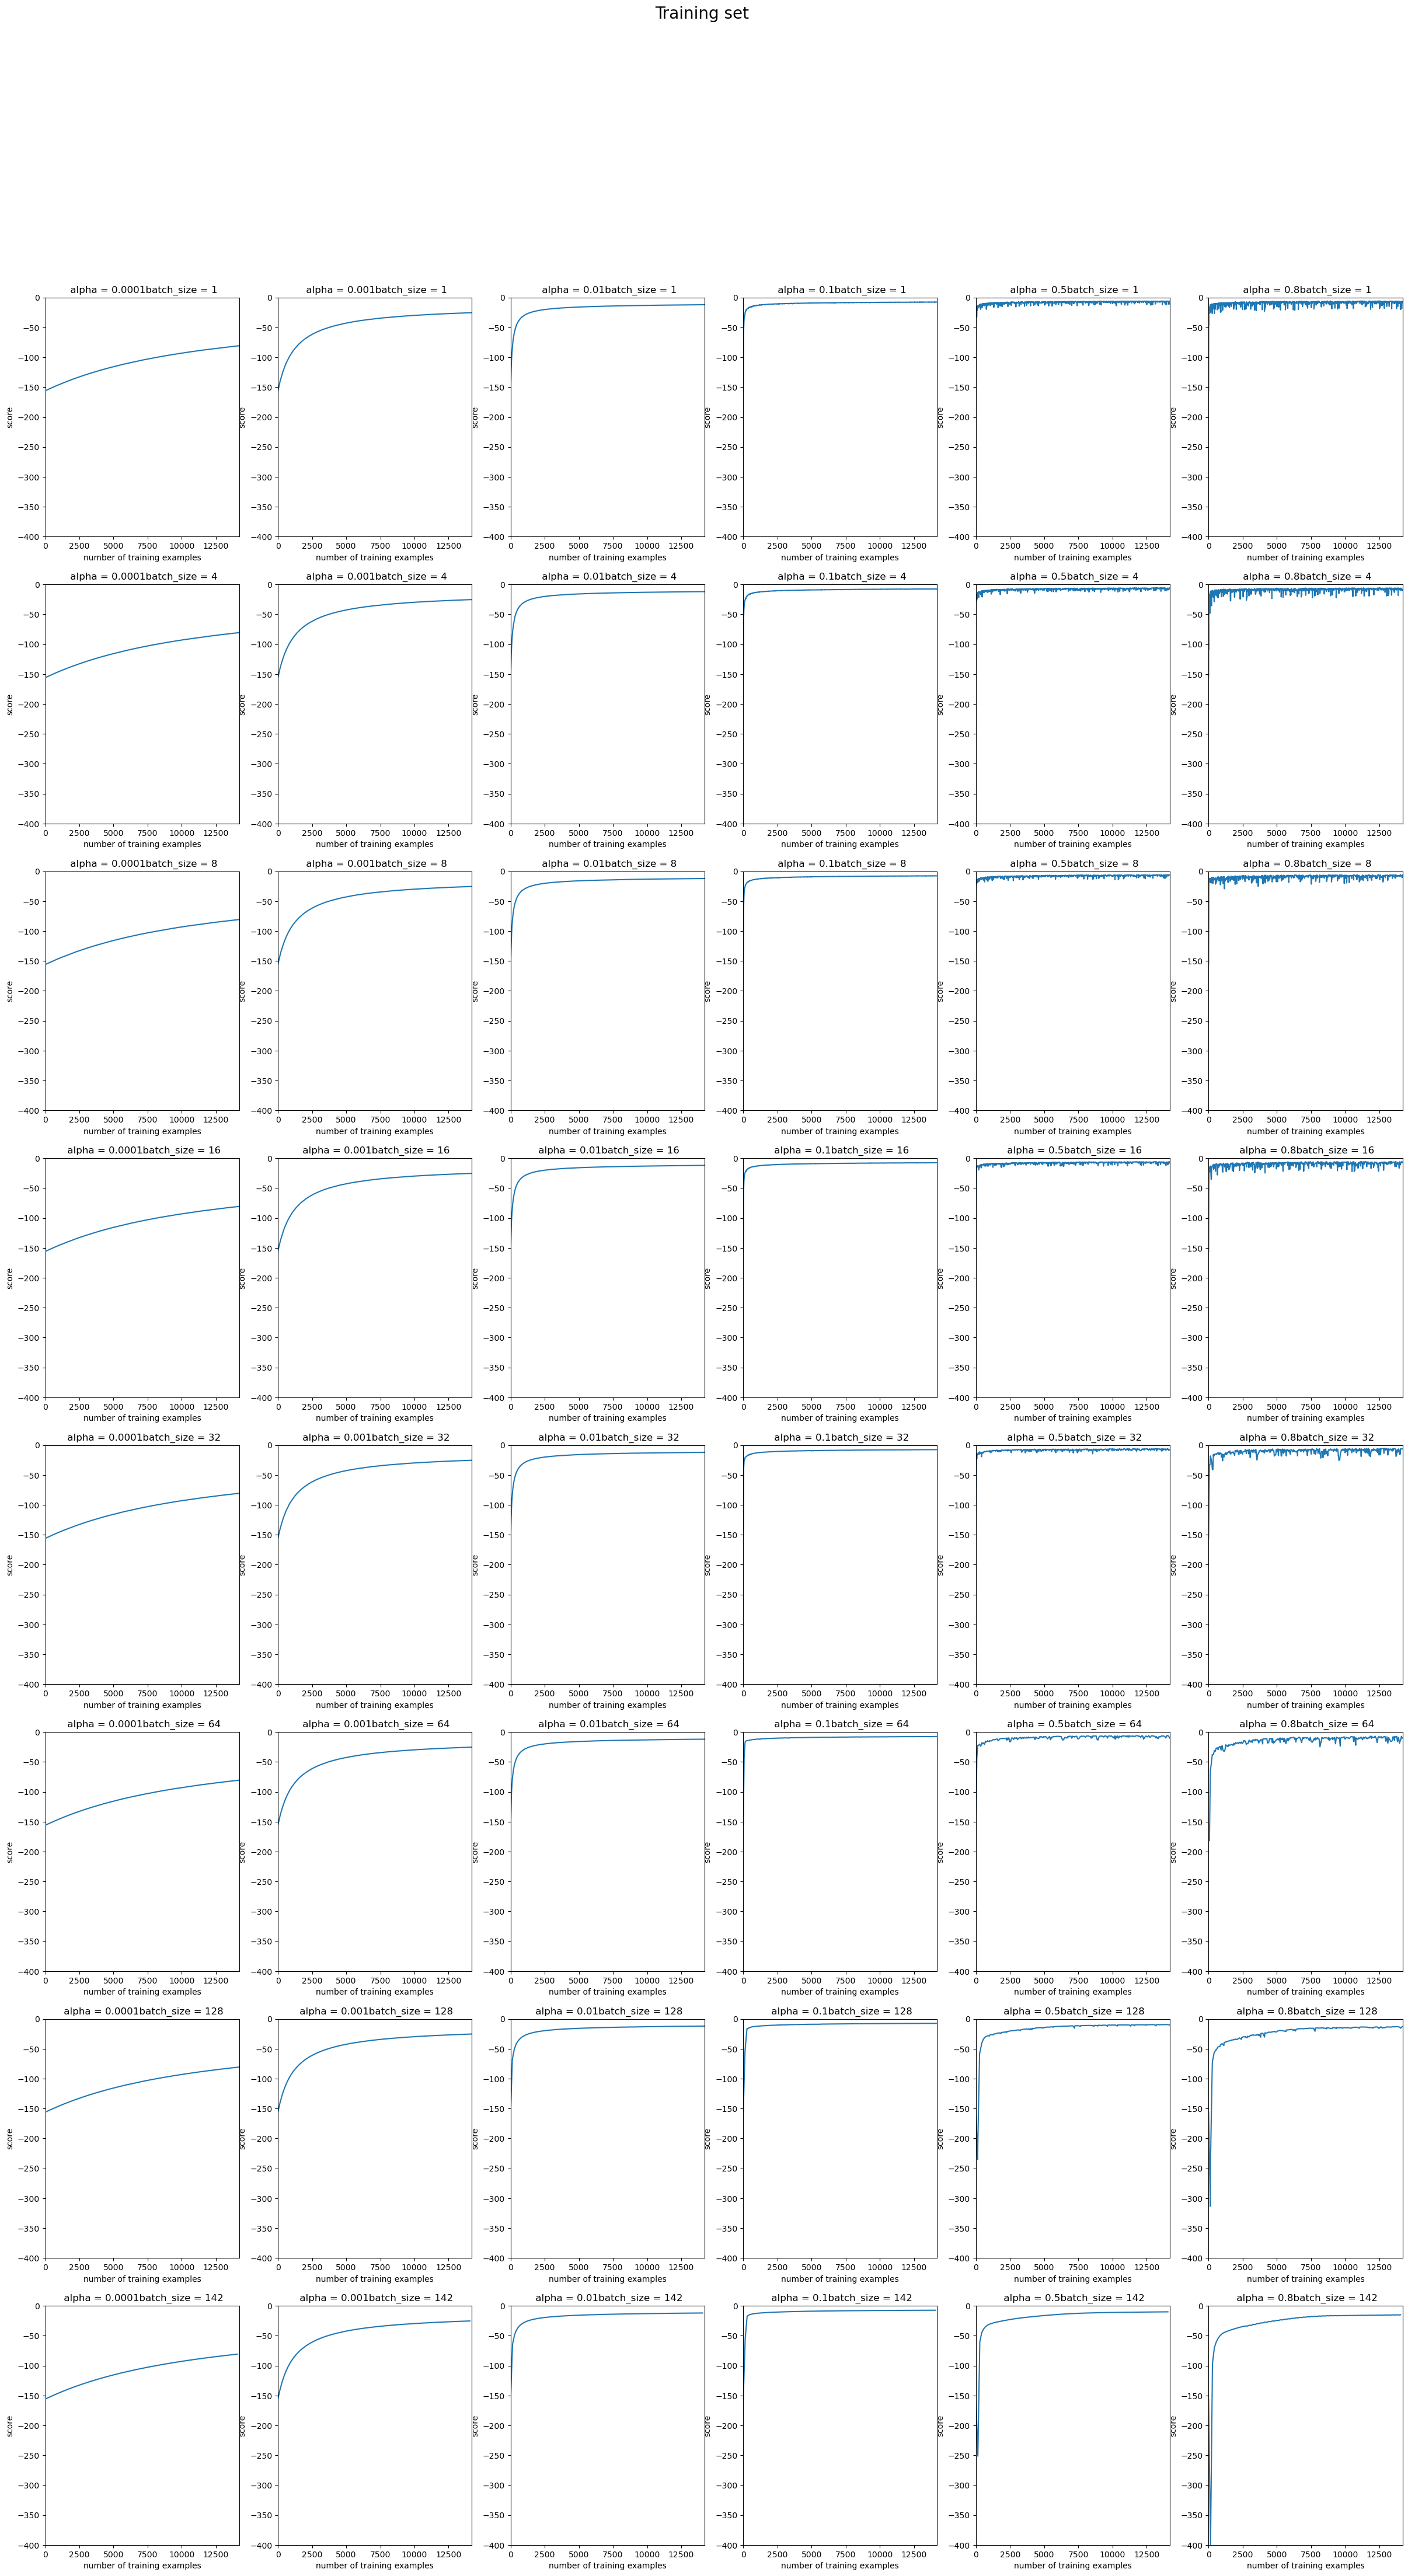

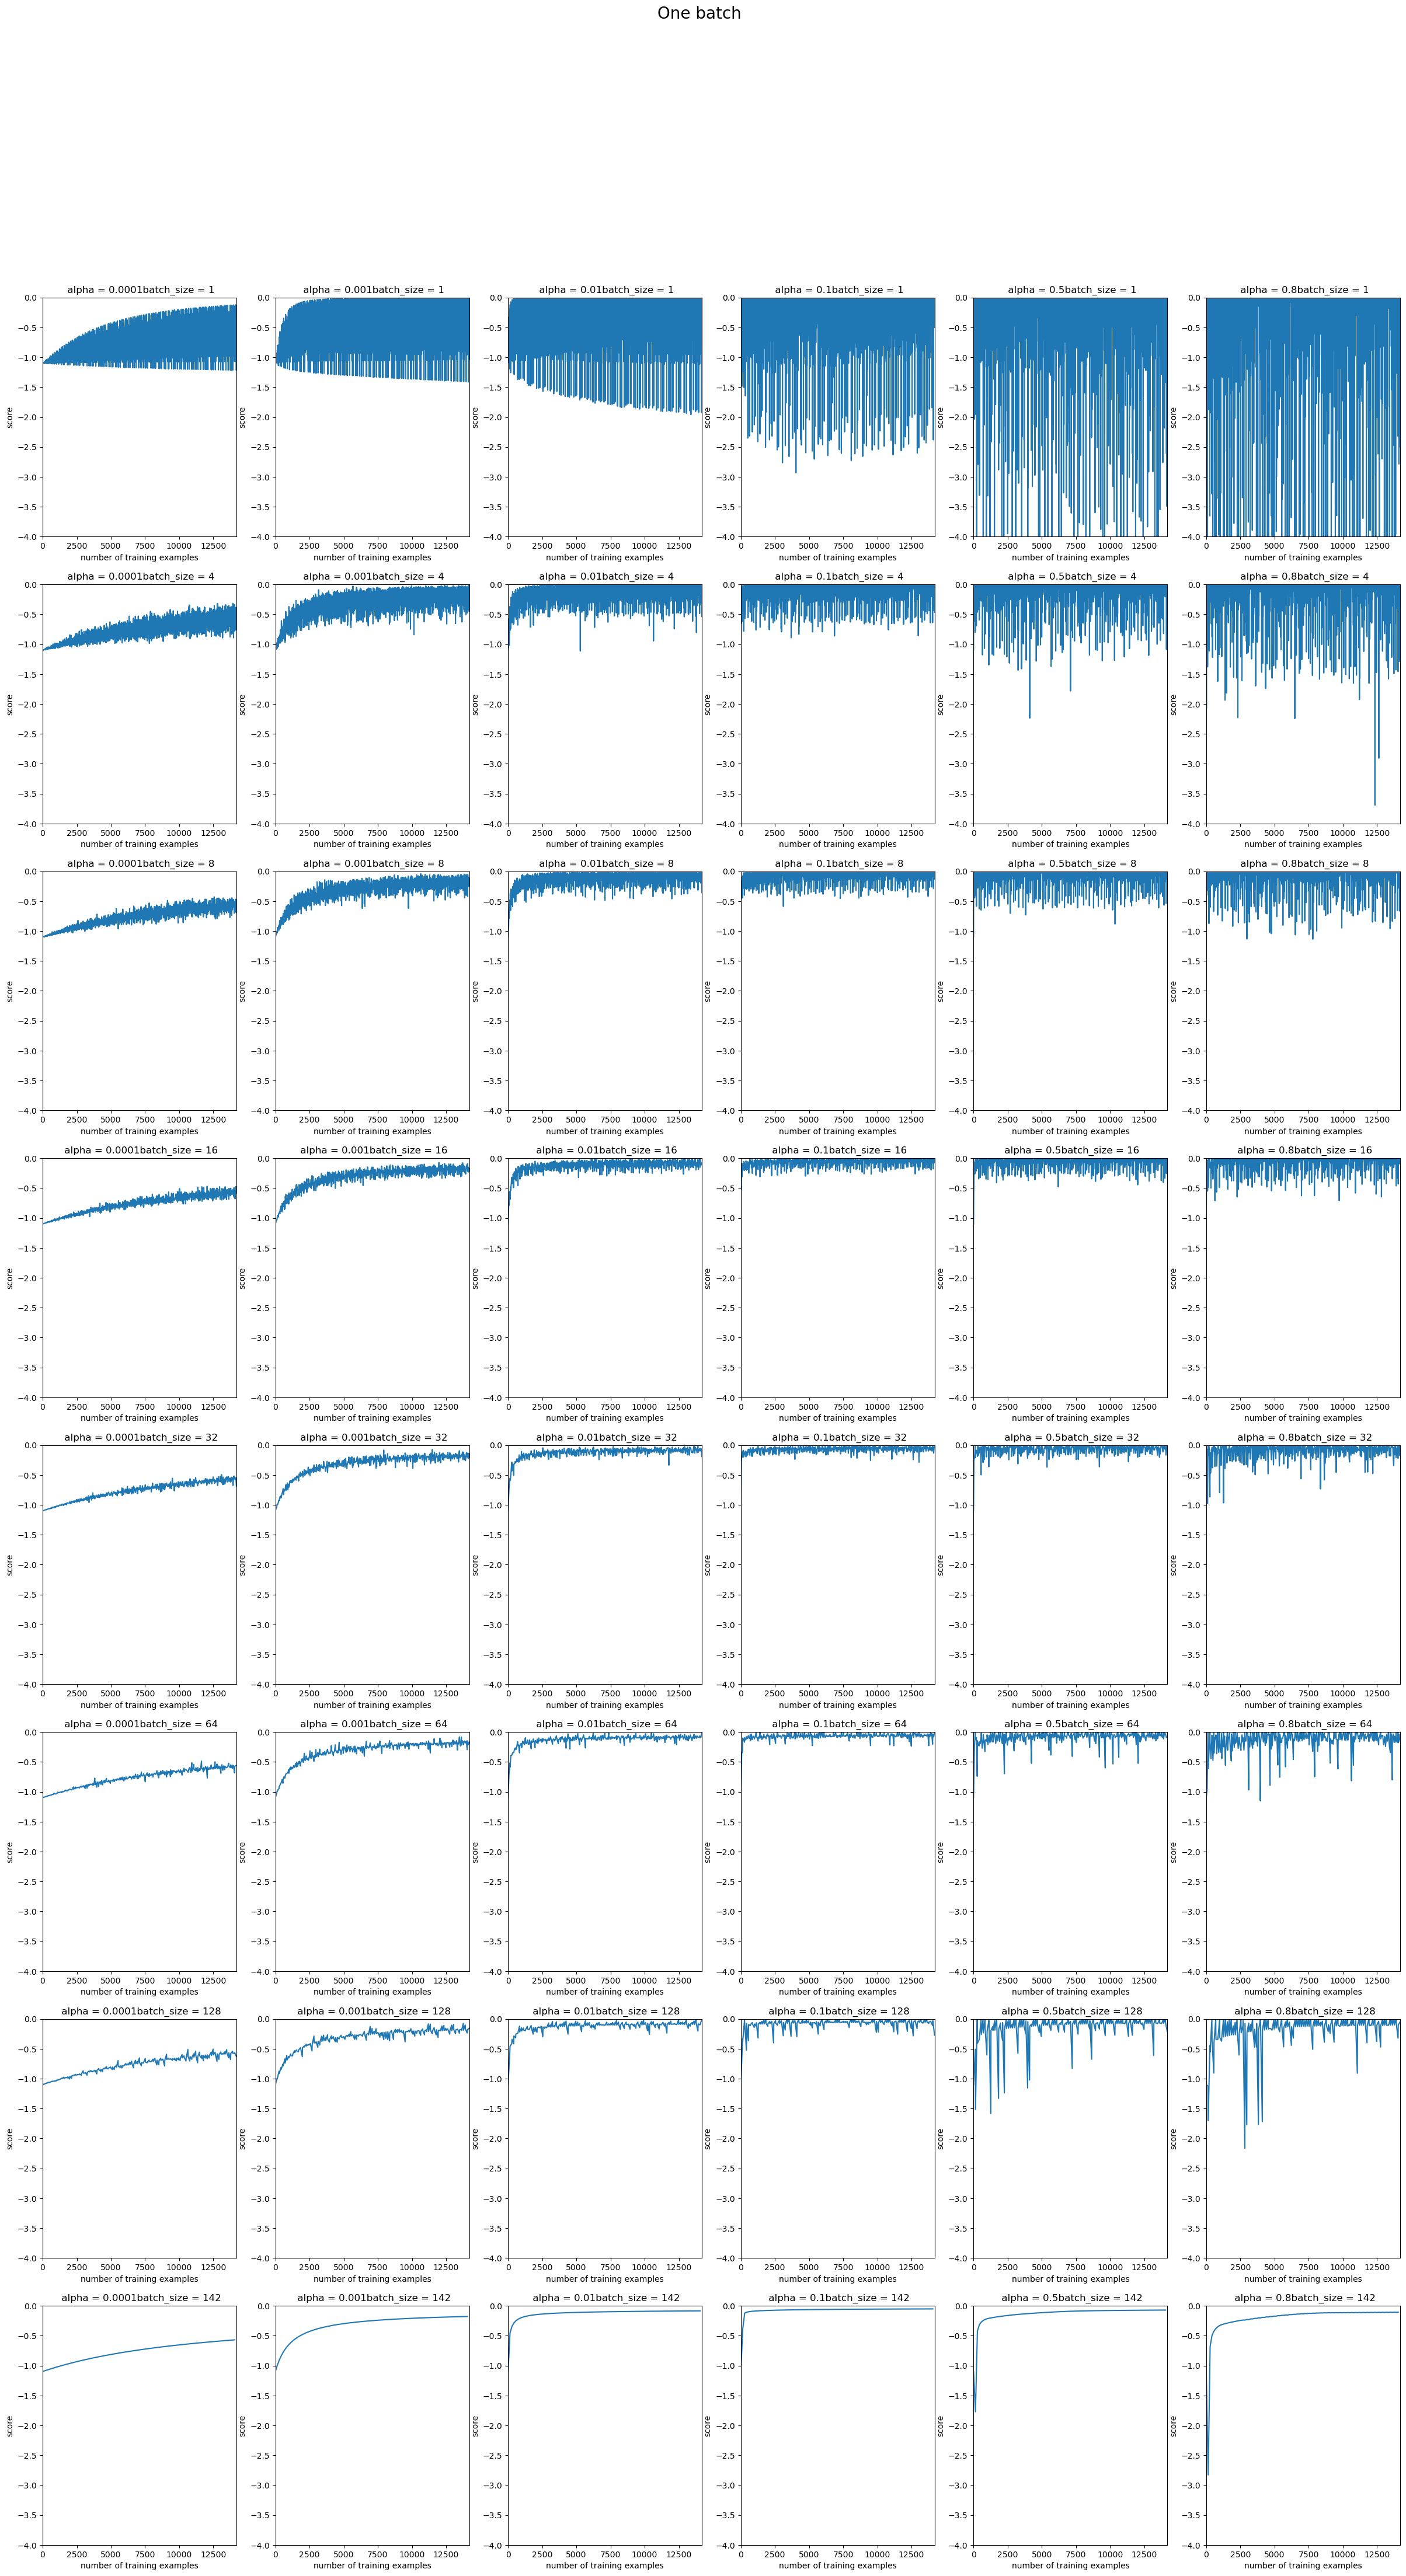

In [33]:
n_epochs = 100

acc_train = np.zeros((8,6));
acc_test = np.zeros((8,6));
last_loss = np.zeros((8,6));

fig1,axs1 = plt.subplots(ncols = 6, nrows = 8, figsize = (30,50) )
fig2,axs2 = plt.subplots(ncols = 6, nrows = 8, figsize = (30,50) )

i = 0;
for batch_size in [1,4,8,16,32,64,128,142]: 
    j = 0;
    for alpha in [0.0001,0.001,0.01,0.1,0.5, 0.8]:
        theta, loss, loss_batch,t = softmax_logistic_regression(X_train_norm, y_train,batch_size,alpha,n_epochs)
        
        acc_train[i,j]= calculate_accuracy(X_train_norm, y_train, theta);
        acc_test[i,j]= calculate_accuracy(X_test_norm, y_test, theta);
        last_loss[i,j] = loss[-1];
        axs1[i,j].plot( t,loss)
        axs1[i,j].set_xlim([0,14200])
        axs1[i,j].set_ylim([-400,0])
        axs1[i,j].set_xlabel("number of training examples")
        axs1[i,j].set_ylabel("score")
        axs1[i,j].set_title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))


        axs2[i,j].plot( t,loss_batch)
        axs2[i,j].set_xlim([0,14200])
        axs2[i,j].set_ylim([-4,0])
        axs2[i,j].set_xlabel("number of training examples")
        axs2[i,j].set_ylabel("score")
        axs2[i,j].set_title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))
        j+=1
    i+=1;
fig1.suptitle('Training set', fontsize=20)
fig2.suptitle('One batch', fontsize=20)
plt.show()

Ako posmatramo prvu sliku koja predstavlja skor na trening skupu nakon svake iteracije, mozemo jasno videti da sto je veca konstanta obucavanja to brze ulazimo u konvergenciju. Za $\alpha = 0.001$ ne uspevamo dovoljno da se priblizimo nuli, za $\alpha = 0.1$ dobijamo najbolje rezultate a za vece $\alpha$ vidimo da nasa funkcija ima na pocetku nagli pad na ogromnu negativnu vrednost, a pri nekim pokretanjima je imala i neocekivane pikove kao posledicu preskakanja minimuma iz cega mozemo zakljuciti da je $ \alpha^* = 0.1$. S druge strane, ako na prvoj slici posmatramo promenu batch_size deluje da ona ne menja brzinu konvergencije, i ne vidi se preterano sum u proceni varijanse osim na poslenje dve slike, gde se jasno primecuje porast suma za vece batch_size. Na ostalim slikama se ovaj porast ne primecuje jer je sum previse mali da bi se video u ovoj razmeri slike.

Sa druge strane, ako posmatramo drugu sliku, pri cemu je na njoj predstavljen skor ali koji je podeljen sa brojem odbiraka u batch-u da procena ne bi zavisila od njega, vidimo znacajno veliku razliku u sumu kao i to da je konvergencija u proseku za nijansu brza za manje batch_size. Ideja je uvek da uzmemo najmanji moguci batch_size koji ne gresi mnogo u proceni varijanse tj. koji je podnosljivo malo zasumljen. Razlog za to je to sto cemo tako koristiti najmanje memorije, dovoljno brzo konvergirati i u proseku doci do prave vrednosti. Ipak, nikada necemo konvergirati do tacnog resenja kao u slucaju paketnog pristupa. U ovom konkretnom primeru deluje da je najbolji izbor $batch size^* = 32$.

### Uporedni prikaz ostvarenih tacnosti

Kao sto mozemo videti sve dobijene tacnosti su blizu 1, ali je mozda doslo do preobucavanja zbog prevelikog broja iteracija koji smo cekali konvergenciju.

Text(0.5, 1.0, 'Accuracy on training set')

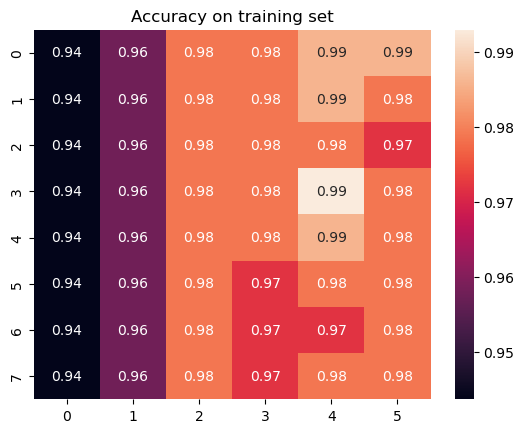

In [34]:
plt.figure()
sns.heatmap(acc_train,annot = True)
plt.title("Accuracy on training set")

Text(0.5, 1.0, 'Accuracy on test set')

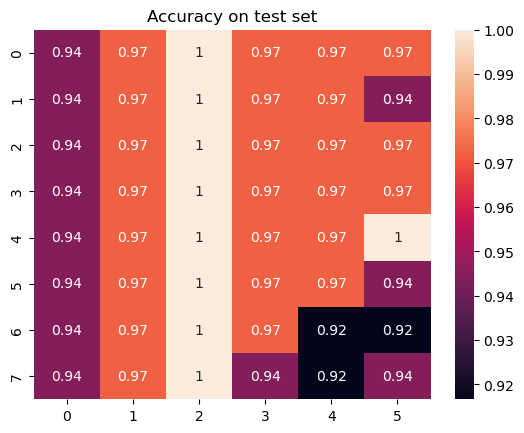

In [35]:
plt.figure()
sns.heatmap(acc_test,annot = True)
plt.title("Accuracy on test set")

### 1. Prikaz treniranja za optimalno alpha i optimalnu velicinu sarze

In [49]:
alpha = 0.1
batch_size = 32

### Ceo trening skup

Text(0.5, 1.0, ' alpha = 0.1batch_size = 32')

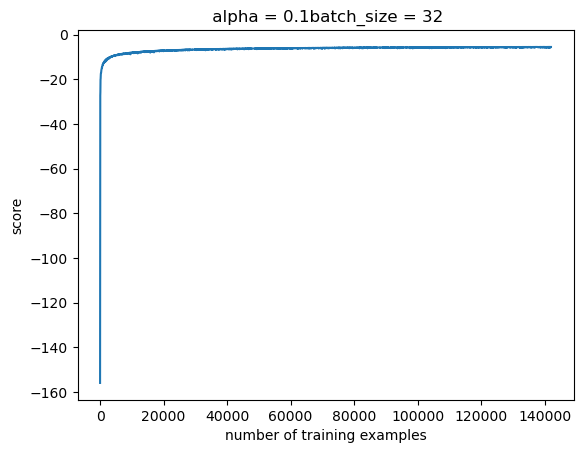

In [50]:
theta, loss, loss_batch, t = softmax_logistic_regression(X_train_norm, y_train,batch_size,alpha,n_epochs) 
plt.plot( t,loss)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

### Jedna sarza

Text(0.5, 1.0, ' alpha = 0.1batch_size = 32')

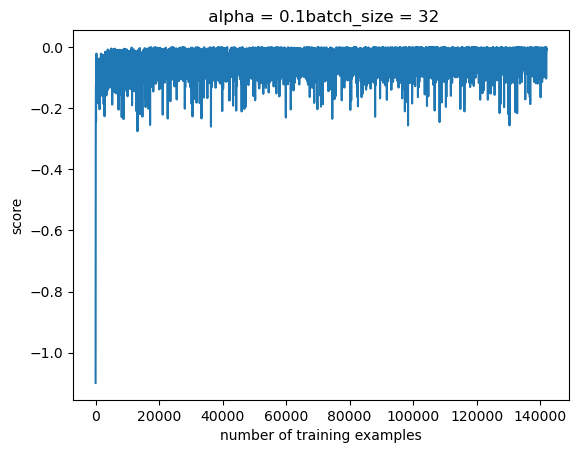

In [51]:
 plt.plot( t,loss_batch)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

In [56]:
n_epochs = 100
theta, loss, loss_batch,t = softmax_logistic_regression(X_train_norm, y_train,batch_size,alpha,n_epochs)
acc_train= calculate_accuracy(X_train_norm, y_train, theta);
acc_test= calculate_accuracy(X_test_norm, y_test, theta);
print("Accuracy on training set for optimal alpha and batch_size is: ",acc_train)
print("Accuracy on test set for optimal alpha and batch_size is: ",acc_test)

Accuracy on training set for optimal alpha and batch_size is:  0.9788732394366197
Accuracy on test set for optimal alpha and batch_size is:  0.9722222222222222


### 2a. Prikaz treniranja za optimalno alpha i preveliku velicinu sarze

In [57]:
alpha = 0.1
batch_size = 142

### Ceo trening skup

Text(0.5, 1.0, ' alpha = 0.1batch_size = 142')

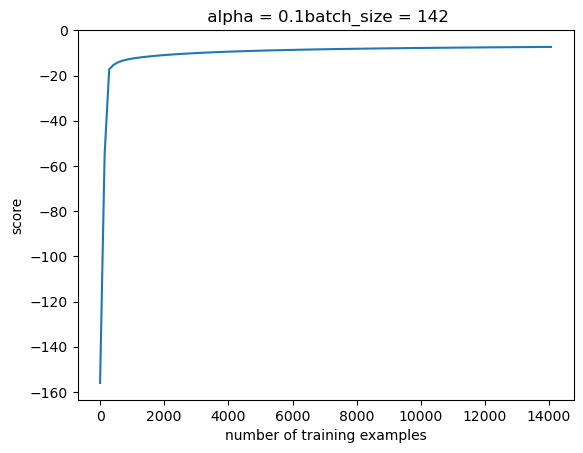

In [58]:
theta, loss, loss_batch, t = softmax_logistic_regression(X_train_norm, y_train,batch_size,alpha,n_epochs) 
plt.plot( t,loss)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

### Jedna sarza

Text(0.5, 1.0, ' alpha = 0.1batch_size = 142')

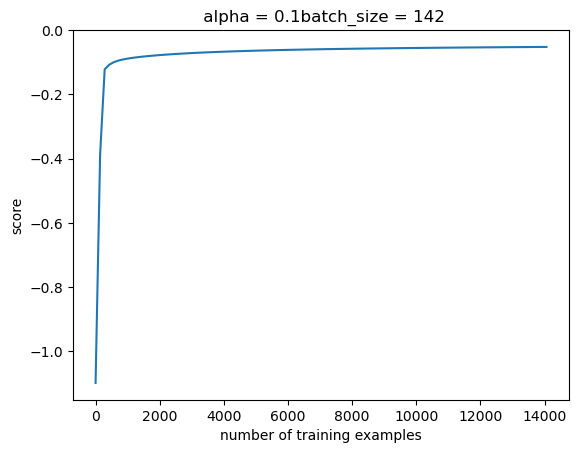

In [59]:
plt.plot( t,loss_batch)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

### 2b. Prikaz treniranja za optimalno alpha i premalu velicinu sarze

In [64]:
alpha = 0.1
batch_size = 4

### Ceo trening skup

Text(0.5, 1.0, ' alpha = 0.1batch_size = 4')

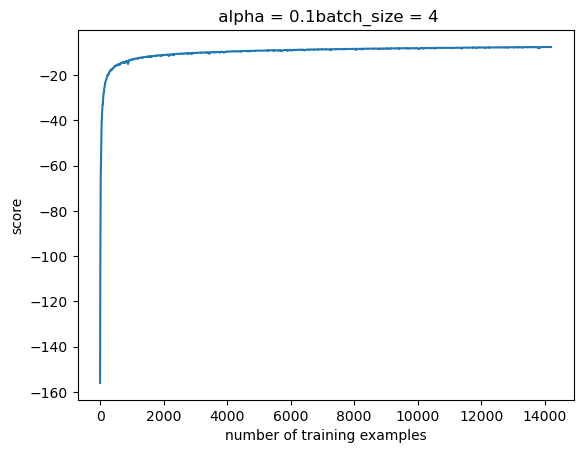

In [65]:
theta, loss, loss_batch, t = softmax_logistic_regression(X_train_norm, y_train,batch_size,alpha,n_epochs) 
plt.plot( t,loss)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

### Jedna sarza

Text(0.5, 1.0, ' alpha = 0.1batch_size = 4')

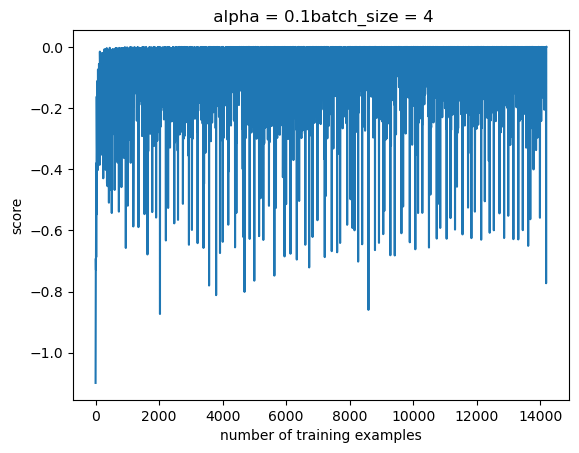

In [66]:
plt.plot( t,loss_batch)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

### 3a. Prikaz treniranja za optimalnu velicinu sarze i preveliko alpha

In [67]:
alpha = 0.5
batch_size = 32

### Ceo trening skup

Text(0.5, 1.0, ' alpha = 0.5batch_size = 32')

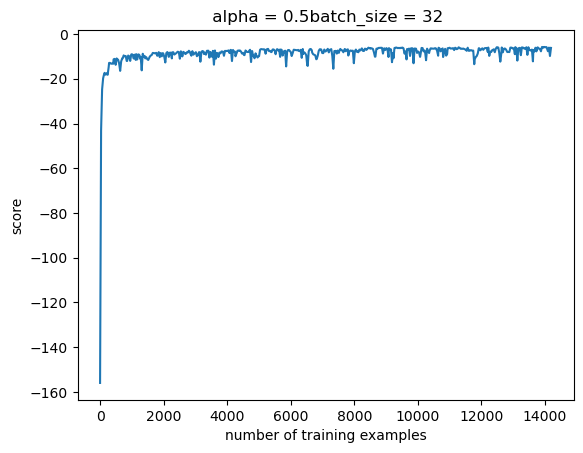

In [68]:
theta, loss, loss_batch, t = softmax_logistic_regression(X_train_norm, y_train,batch_size,alpha,n_epochs) 
plt.plot( t,loss)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

### Jedna sarza

Text(0.5, 1.0, ' alpha = 0.5batch_size = 32')

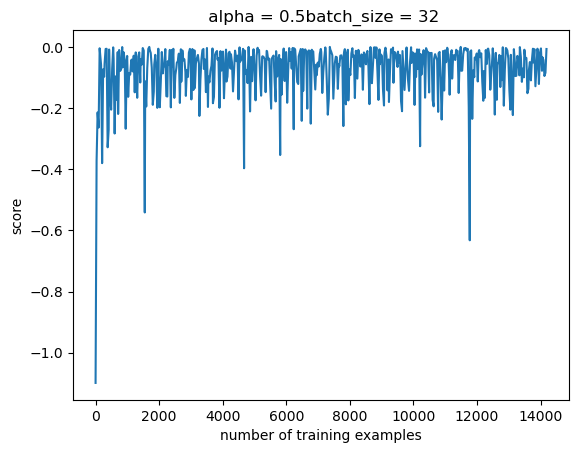

In [69]:
 plt.plot( t,loss_batch)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

### 3b. Prikaz treniranja za optimalnu velicinu sarze i premalo alpha

In [70]:
alpha = 0.0001
batch_size = 32

### Ceo trening skup

Text(0.5, 1.0, ' alpha = 0.0001batch_size = 32')

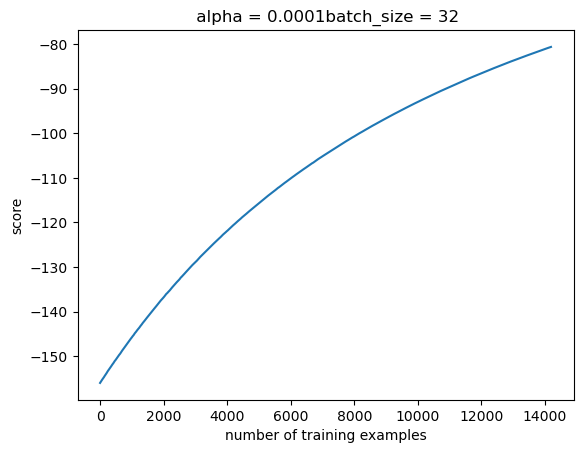

In [71]:
theta, loss, loss_batch, t = softmax_logistic_regression(X_train_norm, y_train,batch_size,alpha,n_epochs) 
plt.plot( t,loss)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

### Jedna sarza

Text(0.5, 1.0, ' alpha = 0.0001batch_size = 32')

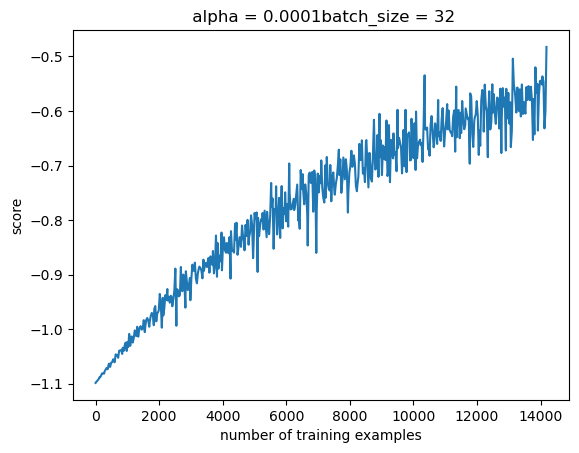

In [72]:
plt.plot( t,loss_batch)
plt.xlabel("number of training examples")
plt.ylabel("score")
plt.title(" alpha = "+str(alpha)+"batch_size = "+str(batch_size))

# GDA

Gausovska diskriminantna analiza spada u generativne modele jer umesto da odredjuje separacionu liniju izmedju klasa njen zadatak je da nauci raspodele klasa. Pretpostavka je da je apriorna verovatnoca za izlaz raspodeljena po bernulijevoj raspodeli. Aprirone verovatnoce su izracunate kao broj sample-ova te klase unutar trening skupa podeljen sa ukupnom velicinom trening skupa. Uslovna raspodela naseg ulaza za odredjene klase je normalna pri cemu se parametri te raspodele racunaju na osnovu statistike primeraka te klase unutar obucavajuceg skupa. S obzirom da smo pretpostavili razlicite kovarijacione matrice dobicemo kvadratnu granicu odlucivanja. Ovom metodu treba manje odbiraka od logisticke regresije za nalazenje resenja i ima analiticko resenje ali ogranicili smo se unapred na normalnu raspodelu.

In [73]:
# Calculating parameters for each class
def GDA_params(X,y):
    n_samples, n_features = X.shape;
    K0 = X[y == 0, :];
    K1 = X[y == 1, :];
    K2 = X[y == 2, :];
    
    K0_mean = np.mean(K0,axis = 0).reshape(1,n_features);
    K1_mean = np.mean(K1,axis = 0).reshape(1,n_features);
    K2_mean = np.mean(K2,axis = 0).reshape(1,n_features);
    
    K0_cov = np.cov(K0.T);
    K1_cov = np.cov(K1.T);
    K2_cov = np.cov(K2.T);
    
    return (K0_mean, K1_mean, K2_mean, K0_cov, K1_cov,K2_cov);

In [74]:
# Predicting class for each input in X by taking most voted class (winner takes it all)
def predict(X,K0_mean, K1_mean, K2_mean, K0_cov, K1_cov,K2_cov):
    h0 = -0.5*np.diag(np.dot(np.dot((X-K0_mean),np.linalg.inv(K0_cov)),(X-K0_mean).T)).reshape(X.shape[0],1)
    h1 = -0.5*np.diag(np.dot(np.dot((X-K1_mean),np.linalg.inv(K1_cov)),(X-K1_mean).T)).reshape(X.shape[0],1)
    h2 = -0.5*np.diag(np.dot(np.dot((X-K2_mean),np.linalg.inv(K2_cov)),(X-K2_mean).T)).reshape(X.shape[0],1)
    
    classes, classes_cnt = np.unique(y, return_counts = True)
    phi0 = classes_cnt[0]
    phi1 = classes_cnt[1]
    phi2 = classes_cnt[2]

    y01 = ((h0-h1)<np.log(phi0/phi1));
    y12 = ((h1-h2)<np.log(phi1/phi2))+1;
    y02 = ((h0-h2)<np.log(phi0/phi2))*2;
    
    preds = np.concatenate([y01,y12,y02], axis = 1);
    y_pred = np.median(preds, axis = 1);

    return y_pred;

In [75]:
# Calculate accuracy     
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred)/len(y_true)  

In [76]:
#%% Calculate accuracies on training and test set
(K0_mean, K1_mean, K2_mean, K0_cov, K1_cov,K2_cov) = GDA_params(X_train, y_train);
y_pred_train = predict(X_train,K0_mean, K1_mean, K2_mean, K0_cov, K1_cov,K2_cov );
y_pred_test = predict(X_test,K0_mean, K1_mean, K2_mean, K0_cov, K1_cov,K2_cov );
acc_train = calculate_accuracy(y_pred_train, y_train)
acc_test = calculate_accuracy(y_pred_test, y_test)

In [77]:
print("Accuracy on training set is: ",acc_train)
print("Accuracy on test set is: ",acc_test)

Accuracy on training set is:  0.971830985915493
Accuracy on test set is:  1.0


## Tacnosti modela na trening skupu

Optimalni model pomocu softmax logisticke regresije ima tacnost 97.87% na trening skupu i tacnost na test skupu 97.22.GDA je ostvario tacnost 97.18% na trening skupu i 1.0 na test skupu.